In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# -----------------------------------------------------------
# Load results
# -----------------------------------------------------------
df = pd.read_csv("scan_results_wc_wv_gc_gv.csv")

In [11]:
sorted(df["wv"].unique()[3:8])

[np.float64(0.0036666666666666),
 np.float64(0.0045555555555555),
 np.float64(0.0054444444444444),
 np.float64(0.0063333333333333),
 np.float64(0.0072222222222222)]

/var/folders/x2/ggtknn9s49s3dcq96ckcgfgh0000gn/T/ipykernel_87959/2529541152.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


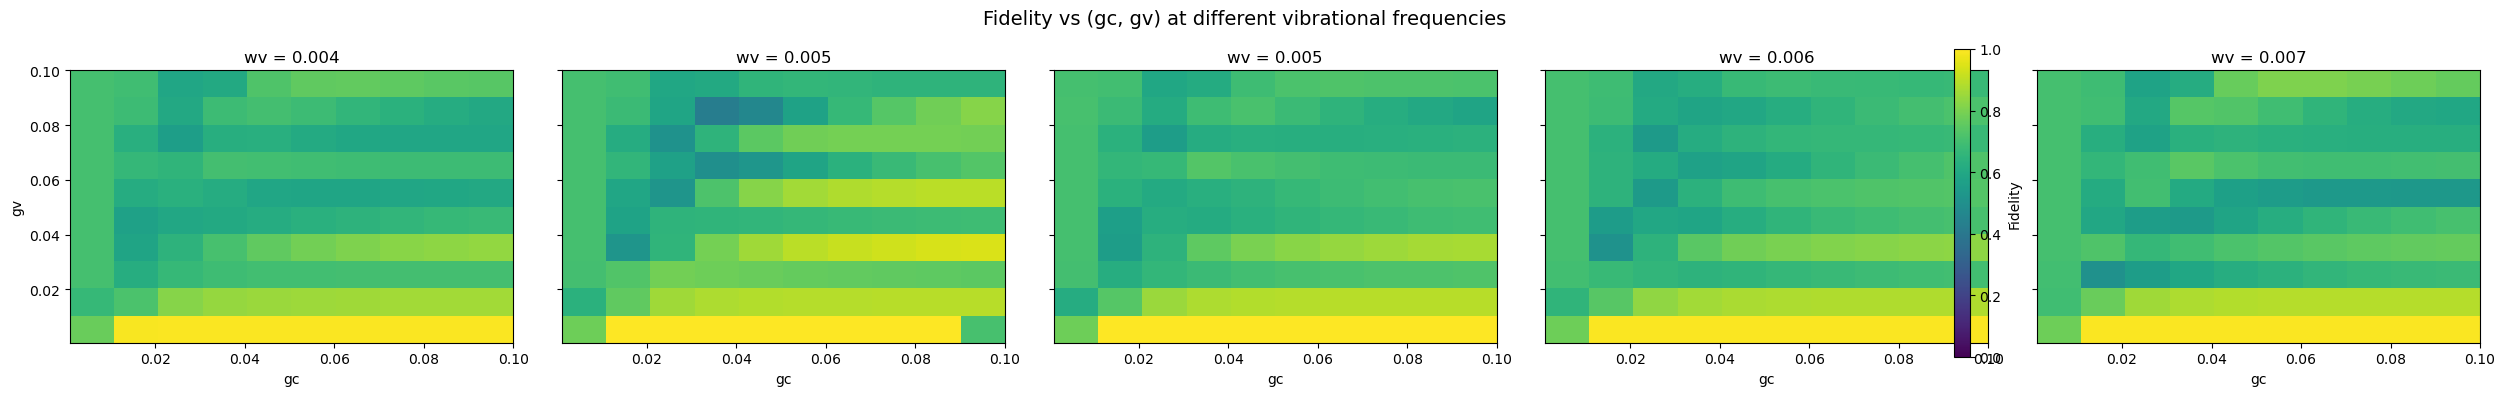

In [12]:
# Unique vibrational frequencies (sorted)
wv_values = sorted(df["wv"].unique()[3:8])

# Set up subplots
ncols = len(wv_values)
fig, axes = plt.subplots(1, ncols, figsize=(5*ncols, 4), sharey=True)

for i, wv_sel in enumerate(wv_values):
    ax = axes[i] if ncols > 1 else axes

    df_slice = df[np.isclose(df["wv"], wv_sel, atol=1e-6)]

    # Pivot to get a 2D grid of Fidelity vs gc, gv
    pivot = df_slice.pivot(index="gv", columns="gc", values="Fidelity")
    pivot = pivot.sort_index().sort_index(axis=1)

    im = ax.imshow(pivot.values,
                   extent=[pivot.columns.min(), pivot.columns.max(),
                           pivot.index.min(), pivot.index.max()],
                   origin="lower", aspect="auto", cmap="viridis",
                   vmin=0, vmax=1)

    ax.set_title(f"wv = {wv_sel:.3f}")
    ax.set_xlabel("gc")
    if i == 0:
        ax.set_ylabel("gv")

fig.suptitle("Fidelity vs (gc, gv) at different vibrational frequencies", fontsize=14)
fig.colorbar(im, ax=axes.ravel().tolist(), label="Fidelity")

plt.tight_layout()
plt.show()


In [14]:
# -----------------------------------------------------------
# Add relative quantities
# -----------------------------------------------------------
# You fixed wc = wq, so use first value as reference
#wc_ref = df["wv"].max() * 0 + 0.12086   # or explicitly set to the wc you used
# Better: if you stored wc in LiH_params, load that instead.
# For now, assume wc = 0.1 (replace with your actual fixed value).
wc_ref = 0.12086

df["gv_gc"] = df["gv"] / df["gc"]
df["wv_wc"] = df["wv"] / wc_ref



Correlation with Fidelity:
Fidelity       1.000000
Concurrence    0.765489
gc             0.176978
wv_wc          0.054052
wv             0.054052
gv_gc         -0.070446
gv            -0.587984
Name: Fidelity, dtype: float64

Correlation with Concurrence:
Concurrence    1.000000
Fidelity       0.765489
gc             0.213456
wv_wc          0.093464
wv             0.093464
gv_gc         -0.316909
gv            -0.550668
Name: Concurrence, dtype: float64


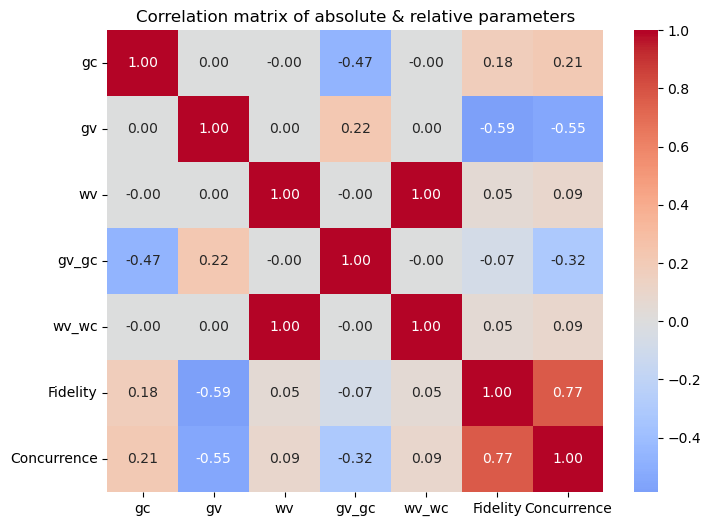

In [19]:
corr = df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Fidelity", "Concurrence"]].corr()

print("Correlation with Fidelity:")
print(corr["Fidelity"].sort_values(ascending=False))
print("\nCorrelation with Concurrence:")
print(corr["Concurrence"].sort_values(ascending=False))

# Heatmap of correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation matrix of absolute & relative parameters")
plt.show()

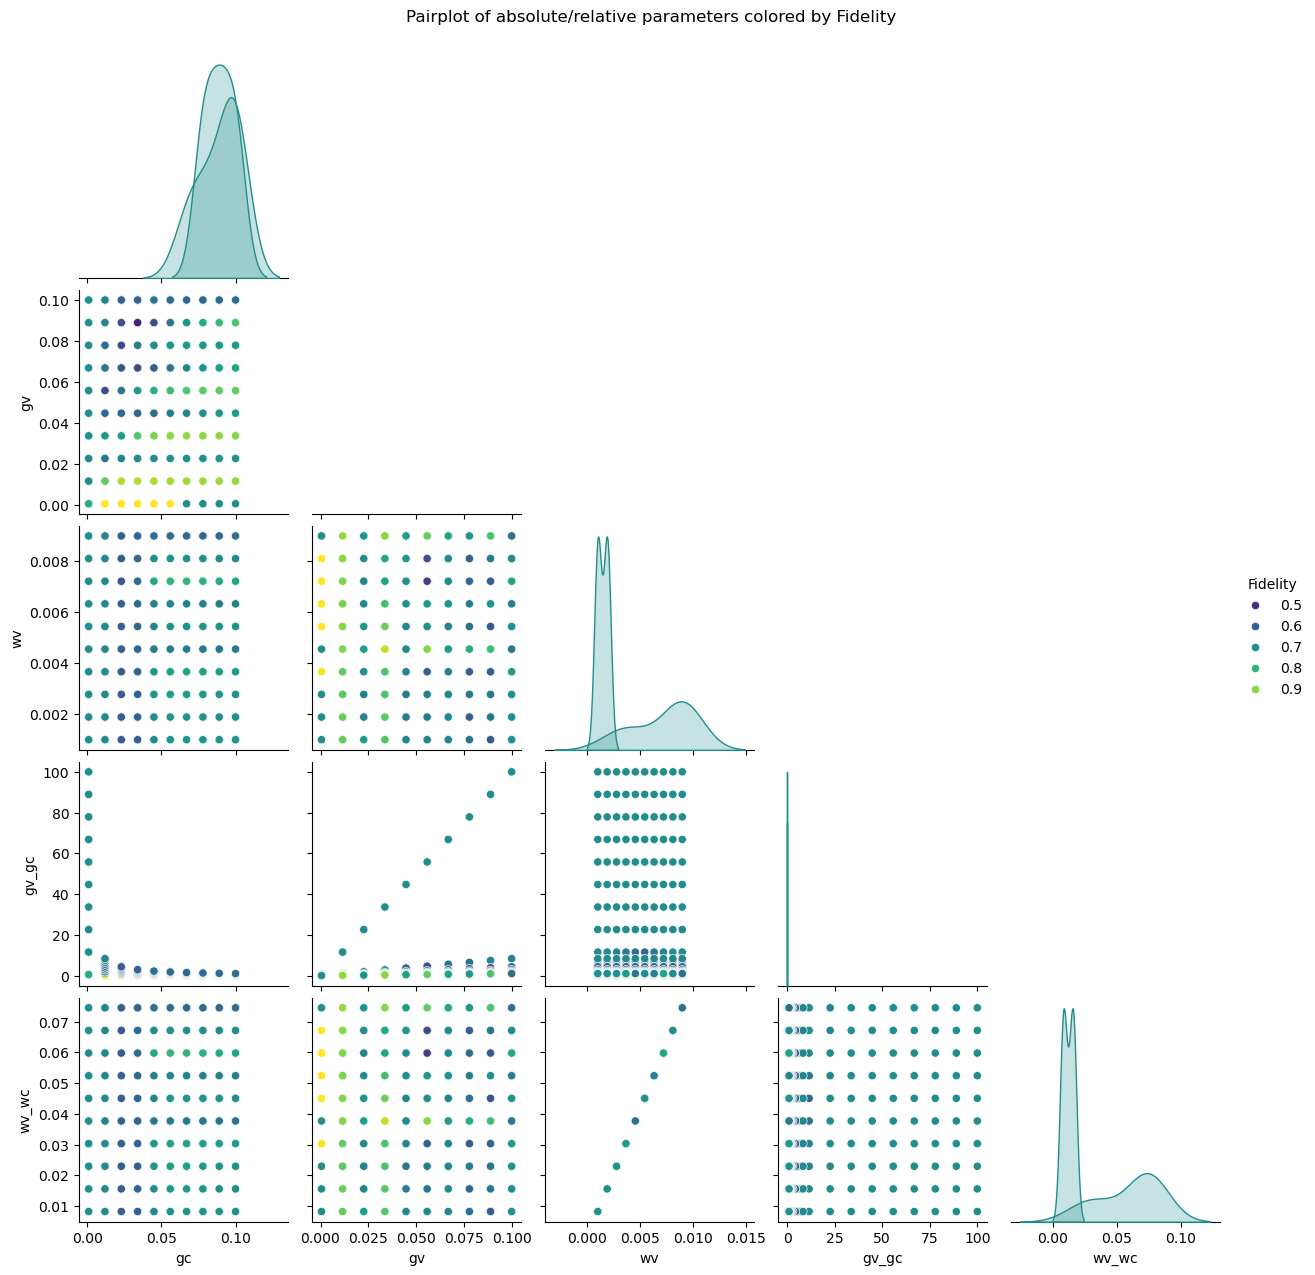

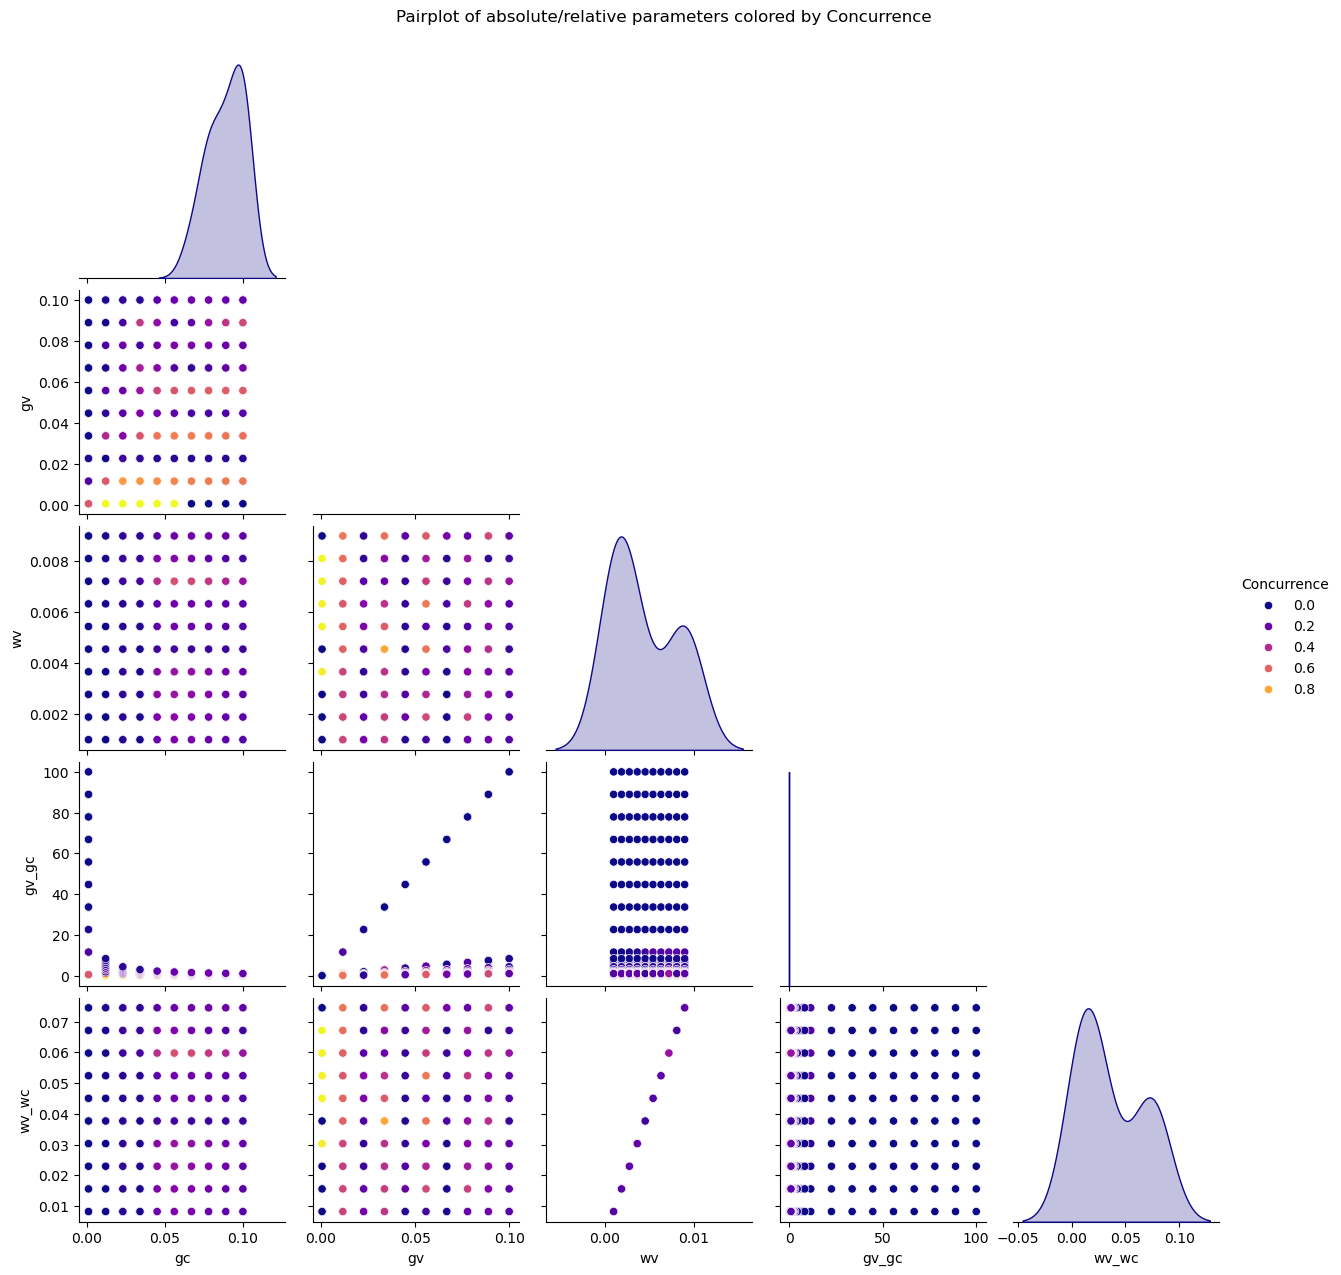

In [20]:
# -----------------------------------------------------------
# Pairplot: color by Fidelity
# -----------------------------------------------------------
sns.pairplot(
    df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Fidelity"]],
    diag_kind="kde", corner=True,
    hue="Fidelity", palette="viridis"
)
plt.suptitle("Pairplot of absolute/relative parameters colored by Fidelity", y=1.02)
plt.show()

# -----------------------------------------------------------
# Pairplot: color by Concurrence
# -----------------------------------------------------------
sns.pairplot(
    df[["gc", "gv", "wv", "gv_gc", "wv_wc", "Concurrence"]],
    diag_kind="kde", corner=True,
    hue="Concurrence", palette="plasma"
)
plt.suptitle("Pairplot of absolute/relative parameters colored by Concurrence", y=1.02)
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

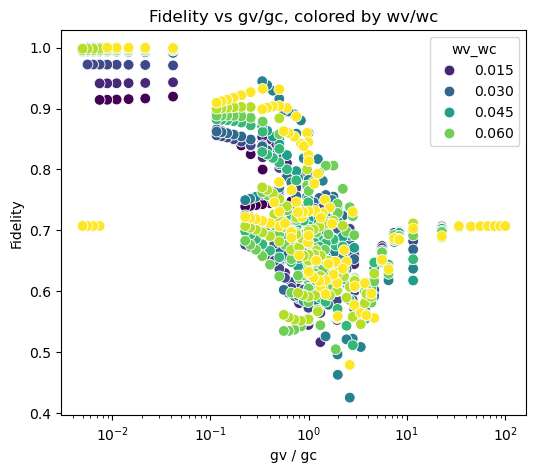

In [17]:
# -----------------------------------------------------------
# Scatter plots
# -----------------------------------------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(x="gv_gc", y="Fidelity", hue="wv_wc", data=df, palette="viridis", s=60)
plt.xscale("log")
plt.xlabel("gv / gc")
plt.ylabel("Fidelity")
plt.title("Fidelity vs gv/gc, colored by wv/wc")
plt.colorbar(label="wv / wc")
plt.show()



RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

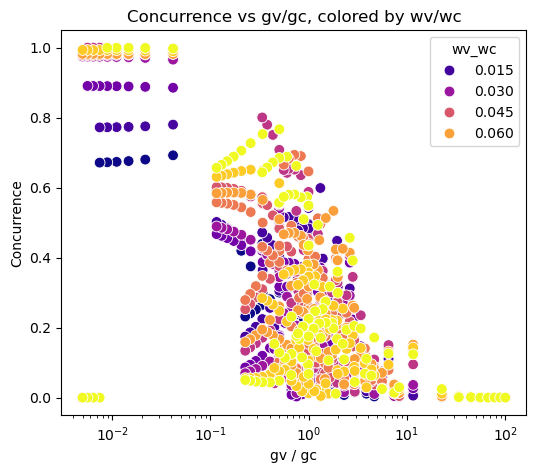

In [18]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="gv_gc", y="Concurrence", hue="wv_wc", data=df, palette="plasma", s=60)
plt.xscale("log")
plt.xlabel("gv / gc")
plt.ylabel("Concurrence")
plt.title("Concurrence vs gv/gc, colored by wv/wc")
plt.colorbar(label="wv / wc")
plt.show()


In [ ]:

# -----------------------------------------------------------
# Heatmap in (gv/gc, wv/wc) plane
# -----------------------------------------------------------
pivot = df.pivot_table(index="gv_gc", columns="wv_wc", values="Fidelity", aggfunc="mean")
pivot = pivot.sort_index().sort_index(axis=1)

plt.figure(figsize=(6,5))
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="viridis",
           vmin=0, vmax=1)
plt.colorbar(label="Fidelity")
plt.xlabel("wv / wc")
plt.ylabel("gv / gc")
plt.title("Fidelity heatmap vs ratios")
plt.show()



In [ ]:
# Same for concurrence
pivot = df.pivot_table(index="gv_gc", columns="wv_wc", values="Concurrence", aggfunc="mean")
pivot = pivot.sort_index().sort_index(axis=1)

plt.figure(figsize=(6,5))
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="plasma",
           vmin=0, vmax=1)
plt.colorbar(label="Concurrence")
plt.xlabel("wv / wc")
plt.ylabel("gv / gc")
plt.title("Concurrence heatmap vs ratios")
plt.show()

In [3]:
corr = df[["gc", "gv", "gc_gv", "T1_gc", "T2_gc", "T_ratio", "Fidelity", "Concurrence"]].corr()
print(corr["Fidelity"])
print(corr["Concurrence"])

gc             0.033662
gv            -0.289547
gc_gv          0.193135
T1_gc          0.078696
T2_gc          0.032190
T_ratio        0.050523
Fidelity       1.000000
Concurrence    0.910004
Name: Fidelity, dtype: float64
gc            -0.223342
gv            -0.285662
gc_gv          0.179523
T1_gc         -0.154385
T2_gc         -0.215740
T_ratio        0.100404
Fidelity       0.910004
Concurrence    1.000000
Name: Concurrence, dtype: float64


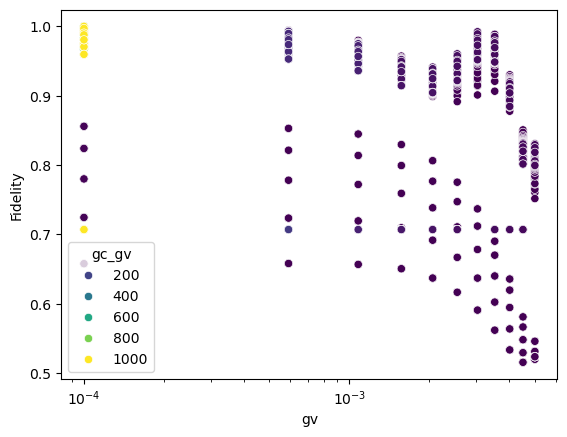

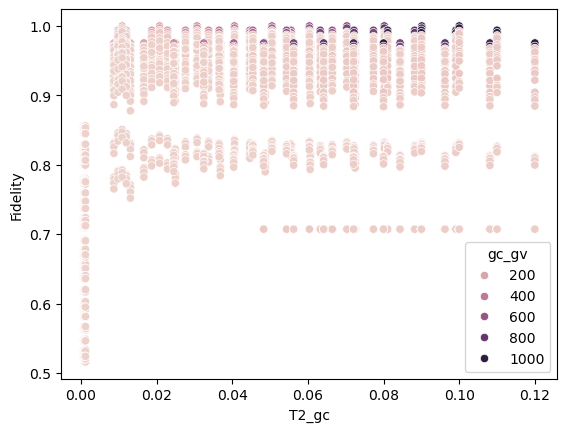

In [5]:


sns.scatterplot(x="gv", y="Fidelity", data=df, hue="gc_gv", palette="viridis")
plt.xscale("log")   # sometimes helps
plt.show()

sns.scatterplot(x="T2_gc", y="Fidelity", data=df, hue="gc_gv")
plt.show()

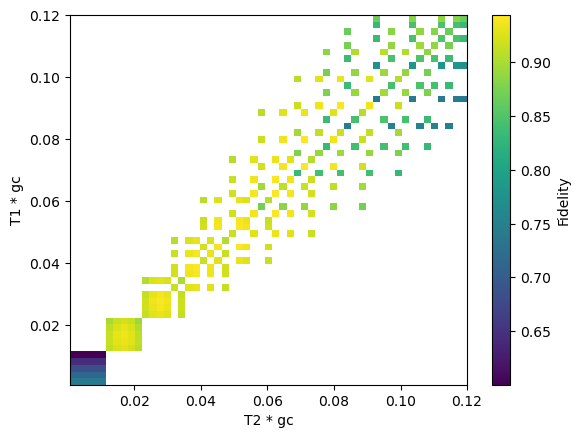

In [6]:
pivot = df.pivot_table(index="T1_gc", columns="T2_gc", values="Fidelity", aggfunc="mean")
plt.imshow(pivot.values,
           extent=[pivot.columns.min(), pivot.columns.max(),
                   pivot.index.min(), pivot.index.max()],
           origin="lower", aspect="auto", cmap="viridis")
plt.xlabel("T2 * gc")
plt.ylabel("T1 * gc")
plt.colorbar(label="Fidelity")
plt.show()

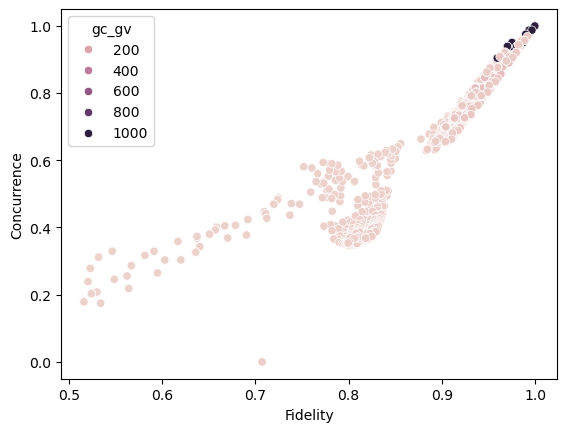

In [7]:
sns.scatterplot(x="Fidelity", y="Concurrence", data=df, hue="gc_gv")
plt.show()